# Groww With Code Internship Program

# Beginner Level Task by Pranav Bansal

# Stock Market Prediction and Forecasting using stacked LSTM

## Importing Libraries

In [48]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import math
warnings.filterwarnings('ignore')

## Loading the Dataset

In [49]:
df = pd.read_csv('stock Market.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [50]:
# Showing the first 5 rows of the dataset
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [51]:
# Showing the last 5 rows of the dataset
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


## Basic Understanding of the Dataset

In [52]:
#showing the dimensions of the dataset
df.shape

(2035, 8)

In this Dataset we have 2035 rows and 8 columns

In [53]:
# showing columns of the dataset
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [54]:
# showing information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [55]:
# Descriptive Statistics Analysis of Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2035.0,1.497137e+02,4.866451e+01,81.10,120.025,141.50,157.175,327.70
High,2035.0,1.519928e+02,4.941311e+01,82.80,122.100,143.40,159.400,328.75
Low,2035.0,1.472939e+02,4.793196e+01,80.00,118.300,139.60,155.150,321.65
Last,2035.0,1.494743e+02,4.873257e+01,81.00,120.075,141.10,156.925,325.95
Close,2035.0,1.494503e+02,4.871204e+01,80.95,120.050,141.25,156.900,325.75
Total Trade Quantity,2035.0,2.335681e+06,2.091778e+06,39610.00,1146444.500,1783456.00,2813594.000,29191015.00
Turnover (Lacs),2035.0,3.899981e+03,4.570768e+03,37.04,1427.460,2512.03,4539.015,55755.08


## Data Preprocessing and Cleaning

In [56]:
# checking for Data Types
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

From the above output we can see that Date Column has wrong data type, so we will convert this data type to datetime data type.

In [57]:
# converion of Object to Datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# checking for data types
df.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object

In [58]:
# checking foer duplicated values
df.duplicated().sum()

0

No dulplicated values found

In [59]:
# checking for null values
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

No null values found

In [60]:
# Sorting the Date of Date Column
df = df.sort_values('Date')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


## Data Visualization

### Viualization of Different Times of Prices (Open, High, Low, Close, Last)

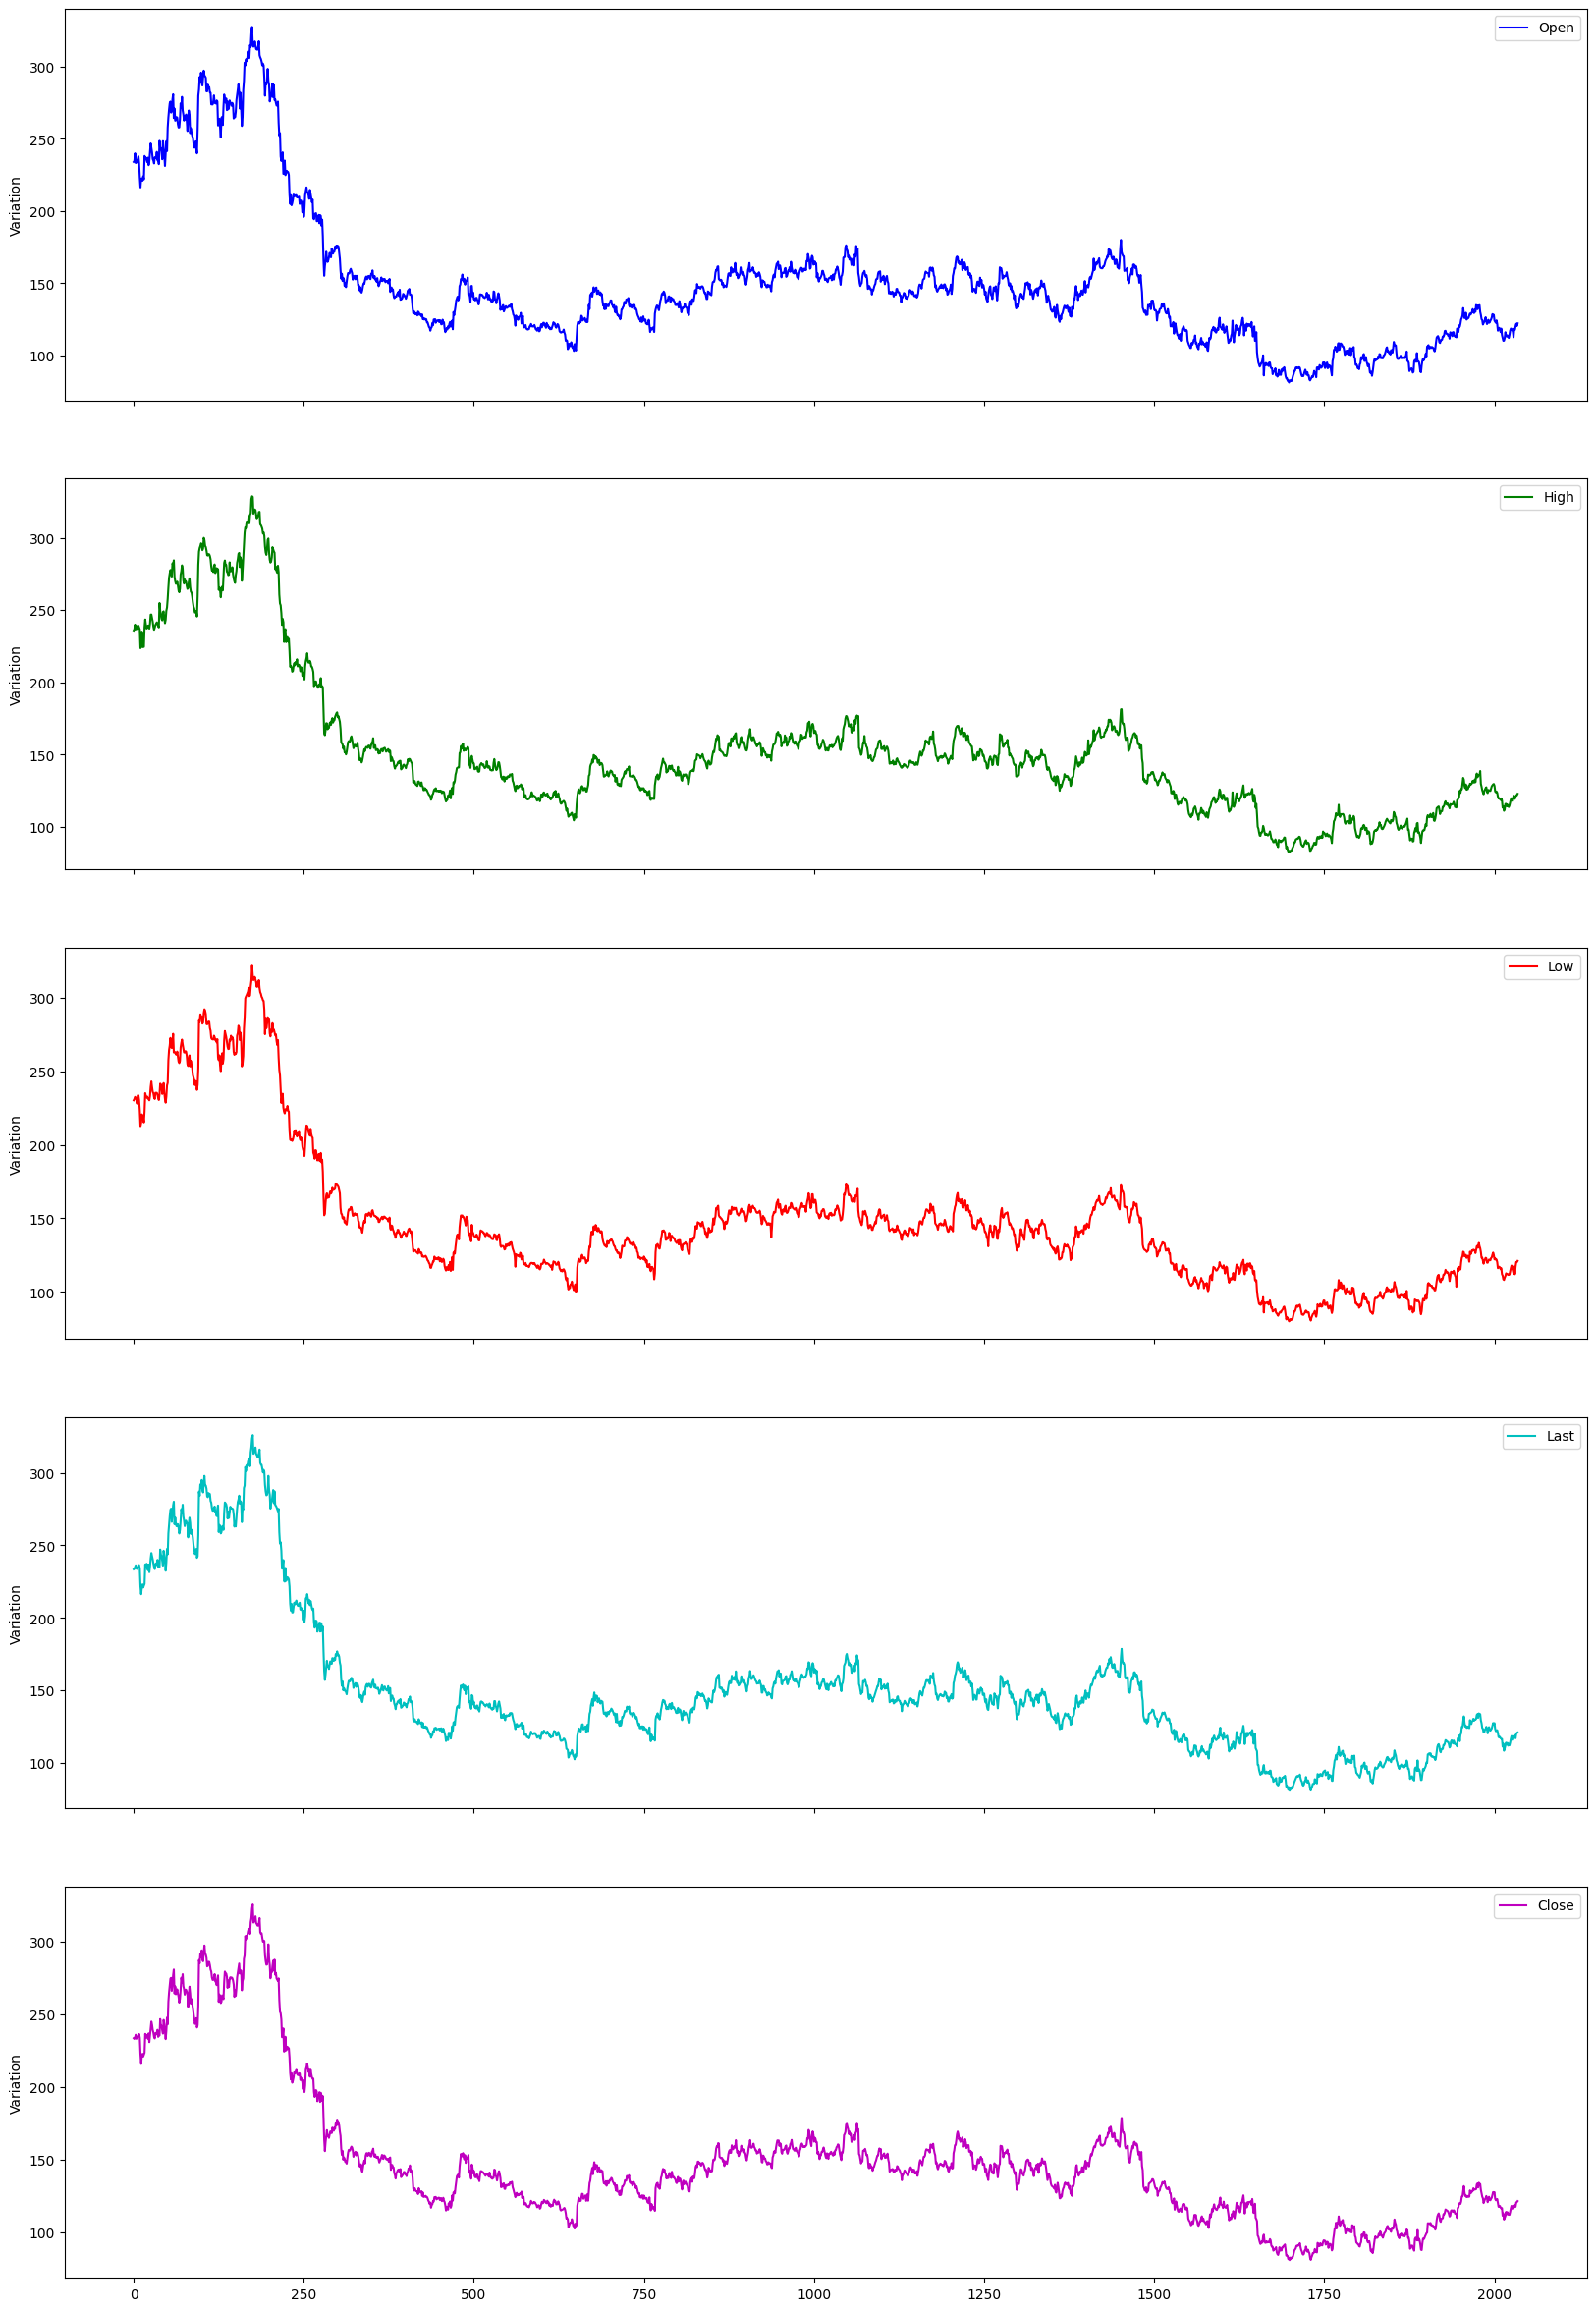

In [61]:
cols_plot = ['Open','High','Low','Last','Close']
colors = ['b','g','r','c','m']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True, color = colors)

for ax in axes:
    ax.set_ylabel('Variation')

### Plotting Correlation Plot

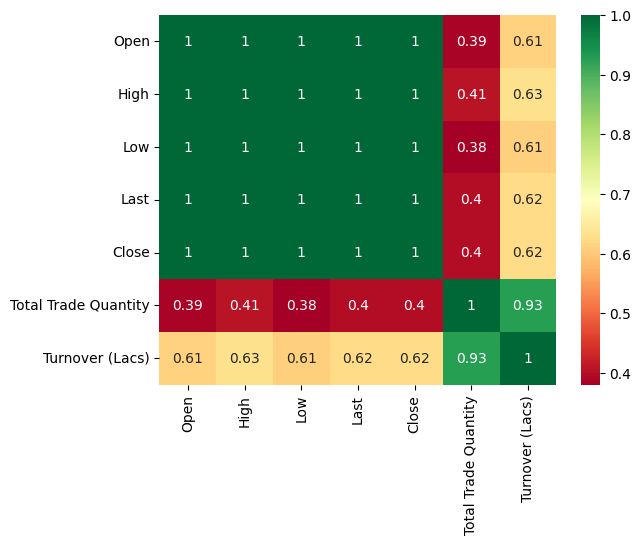

In [62]:
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

## MinMaxScaler

From the original dataset, we can tell that each of our target value are in close proximity to one another. So, we will use MinMaxScaler to scale down all the target variables in the range of (0, 1) for the ease of computation.

In [63]:
df_close = df.reset_index()['Close']
df_close.head()
scaler = MinMaxScaler(feature_range = (0, 1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1, 1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

## Train Test Split

In [64]:
train_size = int(len(df_close)*0.75)
test_size = len(df_close) - train_size
train, test = df_close[0 : train_size, :], df_close[train_size : len(df_close), :1]

In [65]:
print(train_size)
print(test_size)

1526
509


## conversion of an array of values into a dataset matrix

In [66]:
def create_matrix(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        train_X.append(a)
        train_Y.append(dataset[i+time_step,0])
    return np.array(train_X), np.array(train_Y)

In [67]:
step=100
X_train, y_train = create_matrix(train, step)
X_test, y_test = create_matrix(test, step)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1425, 100) (1425,)
(408, 100) (408,)


In [68]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the Stacked LSTM model

In [69]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=64, verbose=1, shuffle=True)

Epoch 1/100
21/21 [==============================] - 12s 270ms/step - loss: 0.0106 - val_loss: 0.0011
Epoch 2/100
21/21 [==============================] - 5s 256ms/step - loss: 0.0018 - val_loss: 9.3099e-04
Epoch 3/100
21/21 [==============================] - 4s 195ms/step - loss: 9.7091e-04 - val_loss: 7.3058e-04
Epoch 4/100
21/21 [==============================] - 4s 194ms/step - loss: 8.3053e-04 - val_loss: 6.6965e-04
Epoch 5/100
21/21 [==============================] - 5s 255ms/step - loss: 8.5906e-04 - val_loss: 5.9399e-04
Epoch 6/100
21/21 [==============================] - 4s 192ms/step - loss: 8.0611e-04 - val_loss: 7.9233e-04
Epoch 7/100
21/21 [==============================] - 4s 191ms/step - loss: 8.9776e-04 - val_loss: 5.4748e-04
Epoch 8/100
21/21 [==============================] - 5s 254ms/step - loss: 7.5479e-04 - val_loss: 5.2206e-04
Epoch 9/100
21/21 [==============================] - 4s 194ms/step - loss: 7.3703e-04 - val_loss: 5.8504e-04
Epoch 10/100
21/21 [==========

## Lets Do the prediction and check performance metrics


In [72]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

13/13 [==============================] - 1s 42ms/step


In [73]:

# Reversing the MinMax Scaler
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
print(train_predict)
print(test_predict)

[[112.12275 ]
 [110.450096]
 [110.91537 ]
 ...
 [139.6931  ]
 [139.87808 ]
 [140.19157 ]]
[[139.72041]
 [141.64888]
 [140.01915]
 [142.6105 ]
 [142.41682]
 [141.5461 ]
 [139.78415]
 [138.74239]
 [136.83624]
 [137.3452 ]
 [138.0591 ]
 [139.28214]
 [139.66156]
 [138.30849]
 [137.18895]
 [136.88858]
 [136.37186]
 [140.44356]
 [140.3773 ]
 [140.92964]
 [141.30272]
 [140.89366]
 [139.5957 ]
 [138.75677]
 [135.88533]
 [136.74875]
 [138.8981 ]
 [142.39128]
 [143.38783]
 [144.21786]
 [143.98819]
 [141.45317]
 [147.59396]
 [150.12225]
 [146.94023]
 [147.19968]
 [148.2776 ]
 [147.98167]
 [147.95226]
 [149.22397]
 [150.25002]
 [150.57652]
 [148.34198]
 [148.00778]
 [150.63103]
 [149.93675]
 [147.96924]
 [146.83423]
 [145.87898]
 [147.53584]
 [149.91933]
 [149.46925]
 [149.36768]
 [149.37881]
 [151.18057]
 [150.25253]
 [150.38872]
 [154.80066]
 [154.59447]
 [152.60666]
 [149.65643]
 [149.67622]
 [151.56573]
 [152.62076]
 [151.67172]
 [150.07237]
 [151.69585]
 [152.383  ]
 [150.6709 ]
 [145.4691 ]


## Calculate RMSE performance metrics

In [74]:
print(math.sqrt(mean_squared_error(y_train, train_predict)))  # train data RMSE
print(math.sqrt(mean_squared_error(y_test,test_predict)))    # test data RMSE

131.59355301756966
217.24789610768298


## Visualise the Predictions

### Shift train prediction for plotting

In [75]:
look_back = 100
train_predict_plot = np.empty_like(df_close)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back : len(train_predict) + look_back, :] = train_predict

### Shift test prediction for plotting

In [76]:
test_predict_plot = np.empty_like(df_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(df_close) - 1, :] = test_predict

### Plotting BaseLine and Prediction

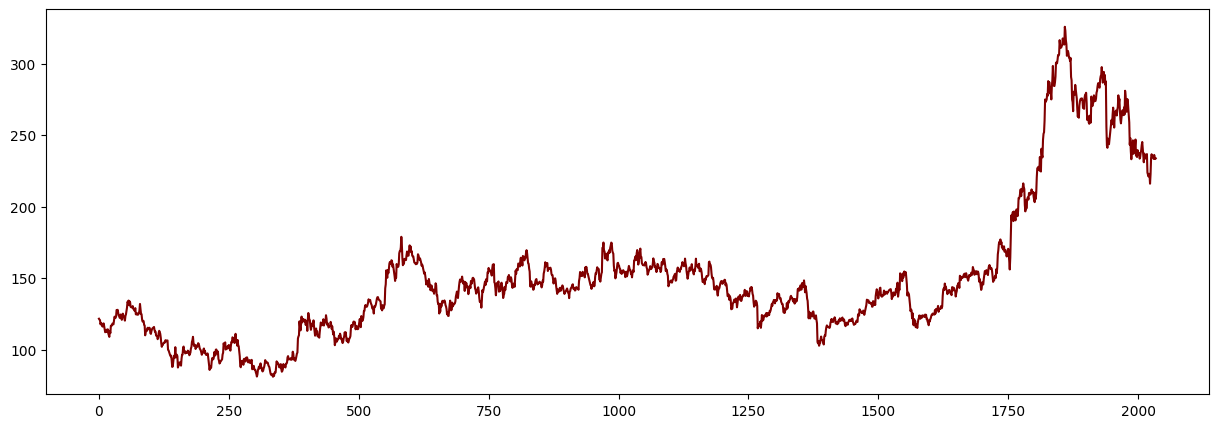

In [77]:
plt.figure(figsize=(15,5))
pred = scaler.inverse_transform(df_close)
plt.plot(pred,color='maroon')
plt.show()

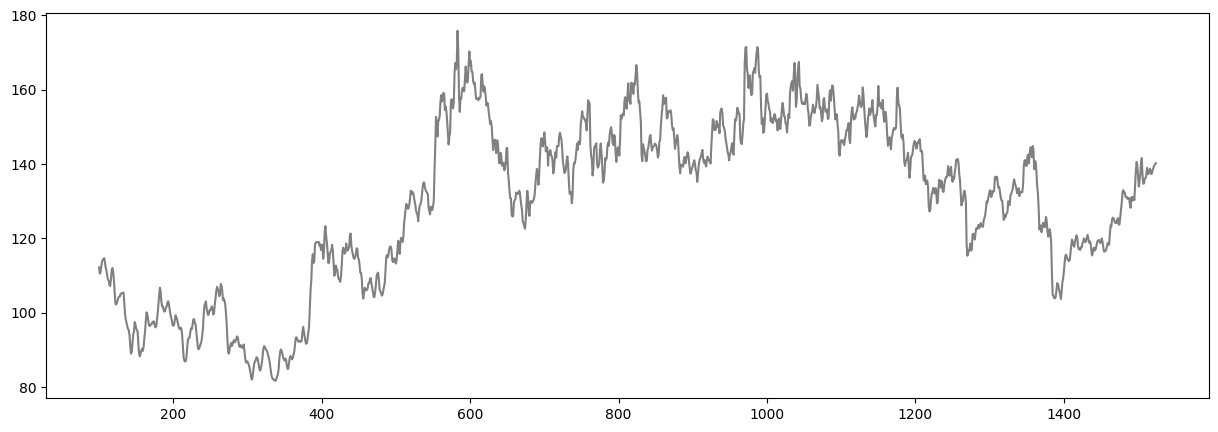

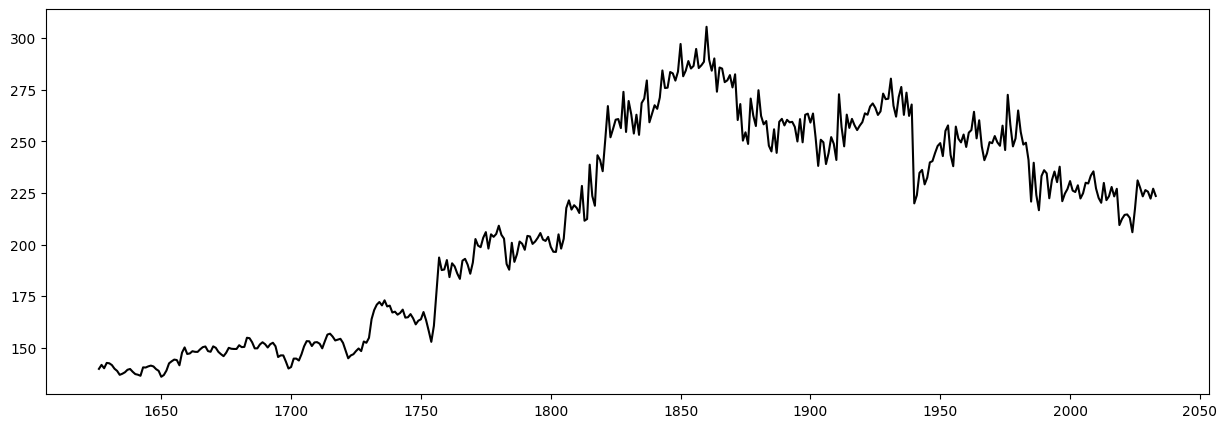

In [78]:
# train data prediction plot
plt.figure(figsize=(15,5))
plt.plot(train_predict_plot,color='grey')
plt.show()

# test data prediction plot
plt.figure(figsize=(15,5))
plt.plot(test_predict_plot,color='black')
plt.show()

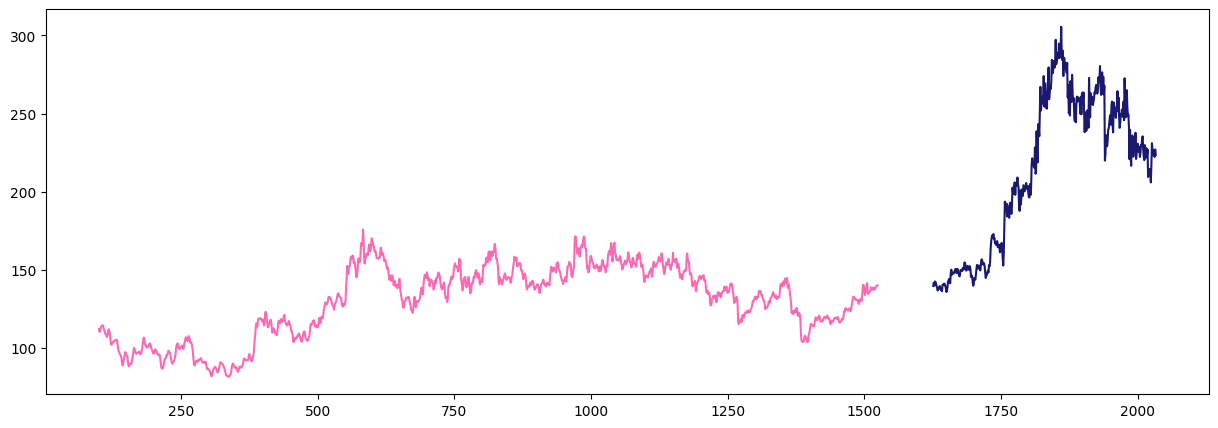

In [79]:
plt.figure(figsize=(15,5))
plt.plot(train_predict_plot,color='hotpink')
plt.plot(test_predict_plot,color='midnightblue')
plt.show()

### plotting  general prediction , train data prediction, test data prediction

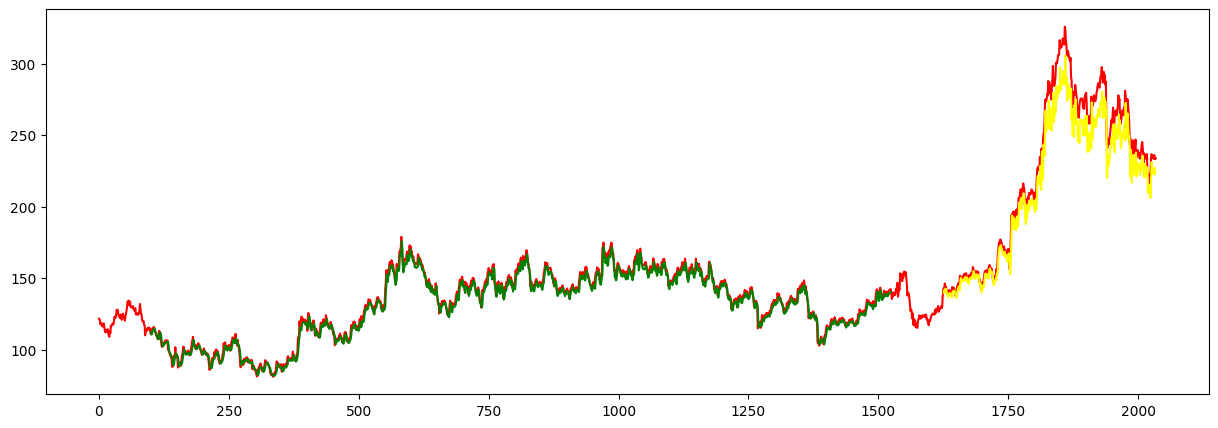

In [80]:
plt.figure(figsize=(15,5))
plt.plot(pred,color='red')
plt.plot(train_predict_plot,color='green')
plt.plot(test_predict_plot,color='yellow')
plt.show()